This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     2874
Number of nonzeros in inequality constraint Jacobian.:     1125
Number of nonzeros in Lagrangian Hessian.............:     1520

Total number of variables............................:      919
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      524
Total number of inequality constraints...............:      666
        inequality constraints with only lower bounds:      257
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      409

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

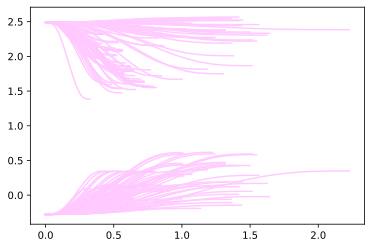

In [32]:
#%%
import numpy as np
import matplotlib.pyplot as plt
import colour as clr
import time

import sys, os

from SimpleOpt import optTrajectories, optiParam
sys.path.append(os.getcwd())
cwd = os.getcwd()
sys.path.append(cwd.rsplit('/', 1)[0])
import ReachingModels as reaching
import plotpresentlib as pp

#0.0560    0.1120     0.1680    0.2240    0.2800
dists = np.linspace(0.05,0.3,5)
distcolors = pp.bluegreen(dists.size)

sim = reaching.DoublePendulum()
l1 = 0.3
l2 = 0.3
# sim.l[0]  = l1
# sim.l[1]  = l2
# sim.l1    = l1
# sim.l2    = l2

%config InlineBackend.figure_formats = ['svg']

timeVal = 20

optiP = sim.movementTimeNoXSetup(
  theTimeValuation  = timeVal, 
  theN              = 50,
  gt1lt0            = 1)

xy0        = np.array([0.05,0.1])

trajout  = list()
optout   = list()
for yb in dists:
  doplot = 0
  xystart = xy0
  traj, optis = sim.updateNoXAndSolve(optiP, 
    xystart, 
    theYBoundary = yb+xystart[1], 
    theDurationInitial = 1.0,
    theTimeValuation = timeVal,
    theGeneratePlots = doplot)
  trajout.append(traj)
  optout.append(optis)


set the boundary such that yEnd must be less than the boundary.
This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     2874
Number of nonzeros in inequality constraint Jacobian.:     1125
Number of nonzeros in Lagrangian Hessian.............:     1520

Total number of variables............................:      919
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      524
Total number of inequality constraints...............:      666
        inequality constraints with only lower bounds:      256
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      410

iter    objective    in

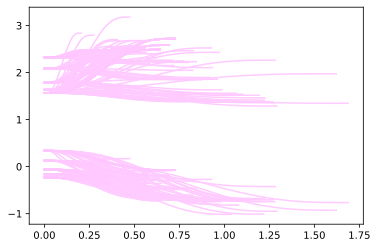

In [33]:
optiPin = sim.movementTimeNoXSetup(
  theTimeValuation  = timeVal, 
  theN              = 50,
  gt1lt0            = 0) #0-> hand has to be less than 'theYBoundary'.

trajin = list()
optiin = list()
for it in trajout:
  if it.solved:
    it_xy_strt  = it.hand[:,0]
    it_xy_end   = it.hand[:,-1]
    xystart           = np.array([it_xy_end[0],it_xy_end[1]])
    trajcur, opticur  = sim.updateNoXAndSolve(optiPin, 
      xystart, 
      theYBoundary = it_xy_strt[1], 
      theDurationInitial = it.time[-1],
      theTimeValuation = timeVal,
      theGeneratePlots = 0)
    trajin.append(trajcur)
    optiin.append(opticur)
  
  else:
    trajin.append(optTrajectories(solved = False))

(51,)
(51,)
(51,)
(51,)
(51,)


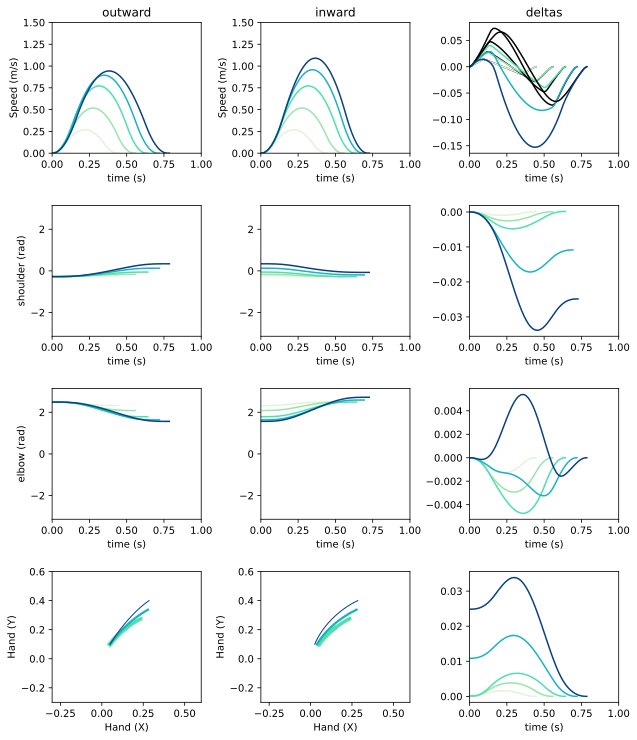

In [44]:
cmPerIn = 2.54
widthCM = 25 #cm
heightCM = 30 #cm
maxspeednorm = trajout[-1].handspeed.max()
lwid = np.linspace(len(trajout)+1,0+1,5)
fig, axs = plt.subplots(4, 3, sharex=False, sharey=False, figsize = (widthCM/cmPerIn,heightCM/cmPerIn))

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
                    
for tout,tin,col,l in zip(trajout,trajin,distcolors,lwid):
    if tin.solved:
      axs[0, 0].plot(tout.time, tout.handspeed, col.get_hex())
      axs[0, 0].set_ylabel("Speed (m/s)")
      axs[0, 0].set_xlim([0,1])
      axs[0, 0].set_ylim([0,1.5])
      axs[0, 0].set_xlabel("time (s)")
      axs[0, 0].set_title("outward")

      axs[1, 0].plot(tout.time, tout.Q[0,:].T, col.get_hex())
      axs[1, 0].set_ylabel("shoulder (rad)")
      axs[1, 0].set_ylim([-np.pi,np.pi])
      axs[1, 0].set_xlim([0,1])
      axs[1, 0].set_xlabel("time (s)")

      axs[2, 0].plot(tout.time, tout.Q[1,:].T, col.get_hex())
      axs[2, 0].set_ylabel("elbow (rad)")
      axs[2, 0].set_xlabel("time (s)")
      axs[2, 0].set_xlim([0,1])
      axs[2, 0].set_ylim([-np.pi,np.pi])

      axs[3, 0].plot(tout.hand[0,:].T,tout.hand[1,:].T, color = col.get_hex(),lw=l)
      axs[3, 0].set_xlim([-0.3,.6])
      axs[3, 0].set_ylim([-.3,.6])
      axs[3,0].set_xlabel('Hand (X)')
      axs[3,0].set_ylabel('Hand (Y)')

      ##
      axs[0, 1].plot(tin.time, tin.handspeed, col.get_hex())
      axs[0, 1].set_ylabel("Speed (m/s)")
      axs[0, 1].set_xlim([0,1])
      axs[0, 1].set_ylim([0,1.5])
      axs[0, 1].set_xlabel("time (s)")
      axs[0, 1].set_title("inward")

      axs[1, 1].plot(tin.time, tin.Q[0,:].T, col.get_hex())
      axs[1, 1].set_ylim([-np.pi,np.pi])
      axs[1, 1].set_xlabel("time (s)")
      axs[1, 1].set_xlim([0,1])

      axs[2, 1].plot(tin.time, tin.Q[1,:].T, col.get_hex()) 
      axs[2, 1].set_ylim([-np.pi,np.pi])
      axs[2, 1].set_xlabel("time (s)")
      axs[2, 1].set_xlim([0,1])
      
      axs[3, 1].plot(tin.hand[0,:].T,tin.hand[1,:].T, color = col.get_hex(), lw=l)
      axs[3, 1].set_xlim([-.3,.6])
      axs[3, 1].set_ylim([-0.3,.6])
      axs[3,1].set_xlabel('Hand (X)')
      axs[3,1].set_ylabel('Hand (Y)')

      #deltas
      axs[0, 2].plot(tout.time, tout.handspeed - np.flip(tout.handspeed), color = '#000000')
      axs[0, 2].plot(tout.time, tout.handspeed - np.flip(tin.handspeed), color = col.get_hex())
      axs[0, 2].set_xlabel("time (s)")
      axs[0, 2].set_xlim([0,1])
      axs[0, 2].set_title("deltas")

      axs[1, 2].plot(tin.time, (tin.hand[0,:].T - np.flip(tout.hand[0,:].T)), color = col.get_hex())
      axs[1, 2].set_xlabel("time (s)")
      axs[1, 2].set_xlim([0,1])

      axs[2, 2].plot(tout.time, (tin.hand[1,:].T - np.flip(tout.hand[1,:].T)), color = col.get_hex())
      axs[2, 2].set_xlabel("time (s)")
      axs[2, 2].set_xlim([0,1])

      dxyHand = tout.hand - np.flip(tin.hand,axis=1) #2xN
      norms = np.linalg.norm(dxyHand,2,0)
      print(norms.shape)
      axs[3, 2].plot(tout.time, np.linalg.norm(dxyHand,2,0),color = col.get_hex())
      axs[3, 2].set_xlabel("time (s)")
      axs[3, 2].set_xlim([0,1])



In [35]:
sim.m


array([2.1 , 1.65, 0.  ])